<a href="https://colab.research.google.com/github/minsung6333/AIFFEL_Quest/blob/main/%08DL_mas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston 주택 가격 예측 모델

In [2]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [1]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

57026/57026 [==============================] - 0s 0us/step
404
102


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
# [[YOUR CODE]]
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
# [[YOUR CODE]]
train_data -= mean
train_data /= std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
# [[YOUR CODE]]
test_data -= mean
test_data /= std

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
# [[YOUR CODE]]
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))  # 선형 활성화 함수 (회귀 작업)

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [5]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
# [[YOUR CODE]]
history = model.fit(train_data, train_labels, epochs=100,
                    batch_size=2, validation_data=(test_data, test_labels))

Epoch 1/100
202/202 [==============================] - 1s 3ms/step - loss: 212.4870 - mae: 10.9909 - val_loss: 43.7041 - val_mae: 5.0161
Epoch 2/100
202/202 [==============================] - 0s 2ms/step - loss: 27.5601 - mae: 3.5385 - val_loss: 21.5185 - val_mae: 3.6608
Epoch 3/100
202/202 [==============================] - 1s 3ms/step - loss: 19.5813 - mae: 2.9952 - val_loss: 21.5618 - val_mae: 3.4241
Epoch 4/100
202/202 [==============================] - 1s 3ms/step - loss: 15.2659 - mae: 2.6929 - val_loss: 19.0751 - val_mae: 3.0725
Epoch 5/100
202/202 [==============================] - 0s 2ms/step - loss: 13.1083 - mae: 2.5156 - val_loss: 18.5221 - val_mae: 2.9851
Epoch 6/100
202/202 [==============================] - 0s 2ms/step - loss: 12.1723 - mae: 2.3830 - val_loss: 21.7245 - val_mae: 3.2304
Epoch 7/100
202/202 [==============================] - 0s 2ms/step - loss: 11.6186 - mae: 2.3062 - val_loss: 19.8045 - val_mae: 3.0671
Epoch 8/100
202/202 [==============================] 

<ipython-input-6-eee1a1311e5a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


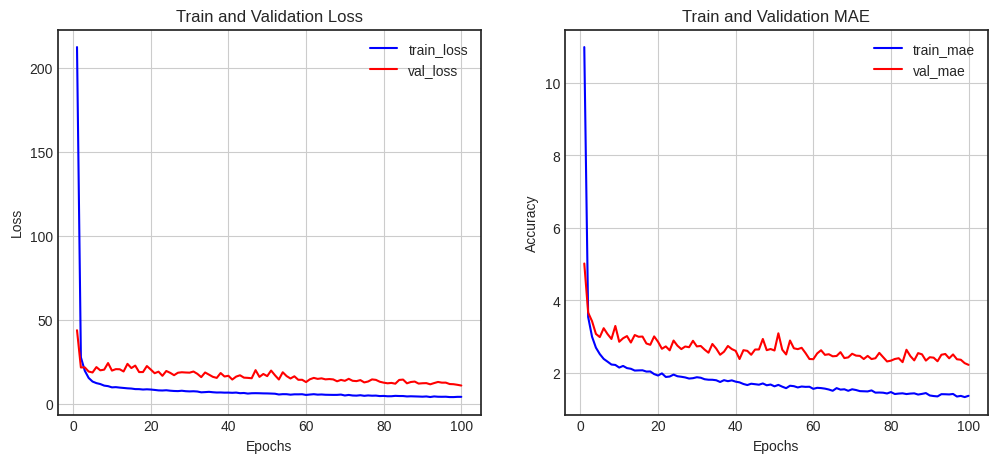

In [6]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [7]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
# [[YOUR CODE]]
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 10.7346 - mae: 2.2186


[10.734634399414062, 2.2185983657836914]

# Reuters 딥러닝 모델

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [9]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
# [[YOUR CODE]]

# Reuters 데이터셋 로드
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# 데이터 분리 (25%를 검증 데이터로)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=42)

# 훈련, 검증, 테스트 데이터 및 레이블 종류 출력
print("훈련 데이터 개수:", len(train_data))
print("검증 데이터 개수:", len(val_data))
print("테스트 데이터 개수:", len(test_data))
print("레이블 종류의 수:", len(set(train_labels)))

2110848/2110848 [==============================] - 0s 0us/step
훈련 데이터 개수: 6736
검증 데이터 개수: 2246
테스트 데이터 개수: 2246
레이블 종류의 수: 46


In [10]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(sequences, dim=10000):
  # [[YOUR CODE]]
  results = np.zeros((len(sequences), dim))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
# [[YOUR CODE]]

y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

In [11]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.Dense(128, name='hidden'))
model.add(layers.BatchNormalization())  # BatchNormalization 추가
model.add(layers.Activation('relu'))  # 활성화 함수 추가
model.add(layers.Dropout(0.5))  # Dropout 추가
model.add(layers.Dense(46, activation='softmax', name='output'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               1280128   
                                                                 
 hidden (Dense)              (None, 128)               16512     
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 output (Dense)              (None, 46)                5934      
                                                      

In [12]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# [[YOUR CODE]]
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

check_point_cb = callbacks.ModelCheckpoint('Reuters_model.h5',
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=40,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/40
211/211 [==============================] - 6s 25ms/step - loss: 1.5596 - accuracy: 0.6537 - val_loss: 1.3309 - val_accuracy: 0.7551
Epoch 2/40
  6/211 [..............................] - ETA: 4s - loss: 0.7925 - accuracy: 0.7812

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


211/211 [==============================] - 7s 34ms/step - loss: 0.8624 - accuracy: 0.7962 - val_loss: 0.9645 - val_accuracy: 0.7943
Epoch 3/40
211/211 [==============================] - 6s 29ms/step - loss: 0.6010 - accuracy: 0.8548 - val_loss: 0.9833 - val_accuracy: 0.8023
Epoch 4/40
211/211 [==============================] - 5s 26ms/step - loss: 0.4390 - accuracy: 0.8894 - val_loss: 1.0258 - val_accuracy: 0.8130
Epoch 5/40
211/211 [==============================] - 5s 23ms/step - loss: 0.3526 - accuracy: 0.9161 - val_loss: 1.0434 - val_accuracy: 0.8054
Epoch 6/40
211/211 [==============================] - 5s 24ms/step - loss: 0.2937 - accuracy: 0.9299 - val_loss: 1.0817 - val_accuracy: 0.8108
Epoch 7/40
211/211 [==============================] - 6s 26ms/step - loss: 0.2628 - accuracy: 0.9368 - val_loss: 1.1419 - val_accuracy: 0.8130
Epoch 8/40
211/211 [==============================] - 5s 23ms/step - loss: 0.2315 - accuracy: 0.9442 - val_loss: 1.1911 - val_accuracy: 0.8134
Epoch 9/40

<ipython-input-14-ef4da0309378>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


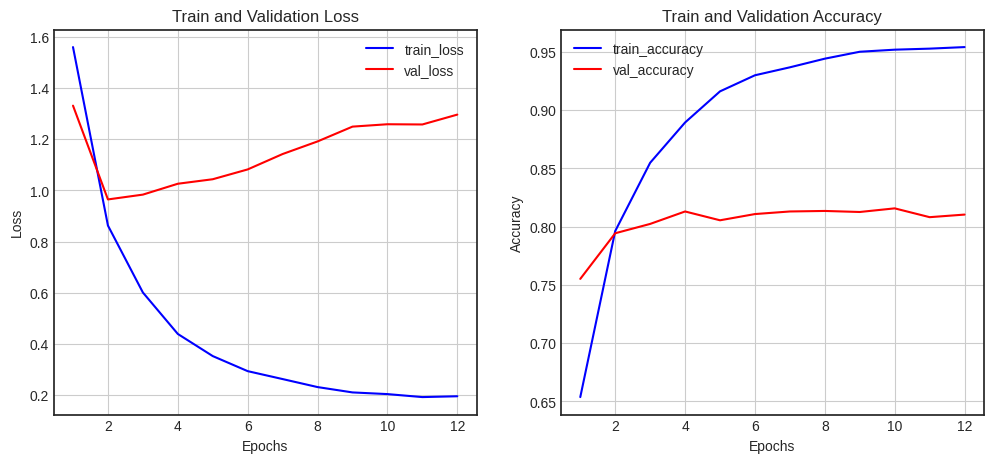

In [14]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [13]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 5ms/step - loss: 1.0036 - accuracy: 0.7680


[1.003643274307251, 0.7680320739746094]

# CIFAR10 딥러닝 모델

In [15]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [16]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
# CIFAR-10 데이터셋 로드
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# 훈련 데이터를 훈련 및 검증 데이터로 분리 (20%를 검증 데이터로)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

170498071/170498071 [==============================] - 2s 0us/step
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [17]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer',
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

<ipython-input-18-6d8a43ba86bc>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


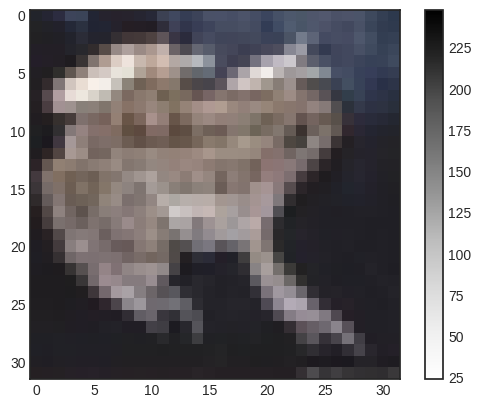

In [18]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [19]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [20]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(-1, 32*32*3)
x_val = x_val.reshape(-1, 32*32*3)
x_test = x_test.reshape(-1, 32*32*3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [21]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [22]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
# [[YOUR CODE]]
model = models.Sequential()
model.add(layers.Input(shape=(3072, )))
model.add(layers.Dense(512, name='hidden1'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, name='hidden2'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 512)               1573376   
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 hidden2 (Dense)             (None, 128)               65664     
                                                                 
 batch_normalization_2 (Bat  (None, 128)               512       
 chNormalization)                                     

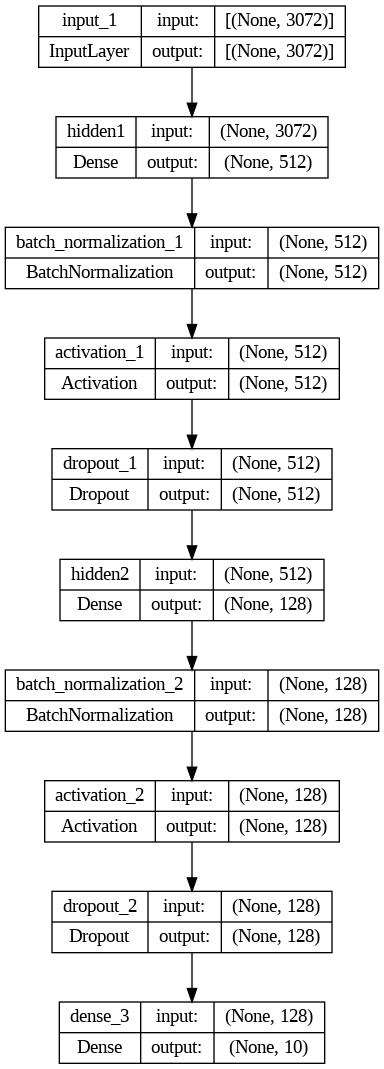

In [23]:
utils.plot_model(model, show_shapes=True)

In [24]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# [[YOUR CODE]]

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

check_point_cb = callbacks.ModelCheckpoint('CIFAR10_model.h5',
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=40,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/40
1250/1250 [==============================] - 24s 19ms/step - loss: 2.1026 - accuracy: 0.2690 - val_loss: 1.7144 - val_accuracy: 0.3964
Epoch 2/40
   3/1250 [..............................] - ETA: 37s - loss: 1.9292 - accuracy: 0.3333

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - 20s 16ms/step - loss: 1.8328 - accuracy: 0.3428 - val_loss: 1.6647 - val_accuracy: 0.4039
Epoch 3/40
1250/1250 [==============================] - 19s 15ms/step - loss: 1.7588 - accuracy: 0.3668 - val_loss: 1.6256 - val_accuracy: 0.4341
Epoch 4/40
1250/1250 [==============================] - 20s 16ms/step - loss: 1.7223 - accuracy: 0.3820 - val_loss: 1.5790 - val_accuracy: 0.4405
Epoch 5/40
1250/1250 [==============================] - 19s 15ms/step - loss: 1.6827 - accuracy: 0.3975 - val_loss: 1.6164 - val_accuracy: 0.4262
Epoch 6/40
1250/1250 [==============================] - 21s 17ms/step - loss: 1.6682 - accuracy: 0.4001 - val_loss: 1.5416 - val_accuracy: 0.4453
Epoch 7/40
1250/1250 [==============================] - 20s 16ms/step - loss: 1.6441 - accuracy: 0.4108 - val_loss: 1.5162 - val_accuracy: 0.4640
Epoch 8/40
1250/1250 [==============================] - 19s 15ms/step - loss: 1.6265 - accuracy: 0.4205 - val_loss: 1.5442 - val_accura

<ipython-input-25-520ccc6b2eab>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


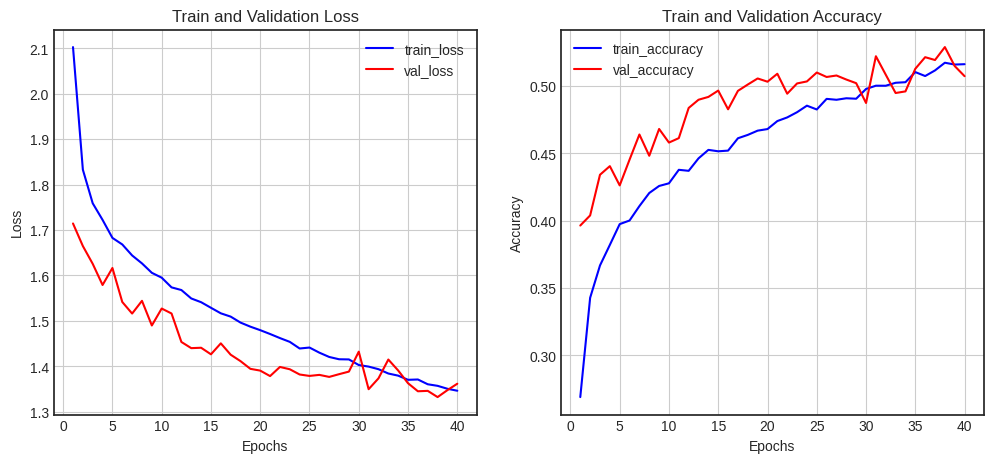

In [25]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
# [[YOUR CODE]]
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [26]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.3592 - accuracy: 0.5112


[1.359159231185913, 0.5112000107765198]